In [1]:
import pandas as pd
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt

df = pd.read_excel('kelembapan.xlsx')
display(df)

,lembap18,lembap19,lembap20,lembap21
0,78,79,88.0,76.0
1,80,74,84.0,68.0
2,84,76,76.0,74.0
3,88,69,78.0,79.0
4,81,70,81.0,80.0
...,...,...,...,...
360,80,93,78.0,80.0
361,76,92,72.0,78.0
362,69,78,76.0,80.0
363,66,80,76.0,80.0


In [2]:
display(df.isnull().sum()) #mengecek NaN
display(df.info())

lembap18     0
lembap19     0
lembap20    13
lembap21     1
dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   lembap18  365 non-null    int64  
 1   lembap19  365 non-null    int64  
 2   lembap20  352 non-null    float64
 3   lembap21  364 non-null    float64
dtypes: float64(2), int64(2)
memory usage: 11.5 KB


None

In [3]:
df = df.dropna(axis=0) #drop nilai 0
display(df.info())
display(df)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 351 entries, 0 to 364
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   lembap18  351 non-null    int64  
 1   lembap19  351 non-null    int64  
 2   lembap20  351 non-null    float64
 3   lembap21  351 non-null    float64
dtypes: float64(2), int64(2)
memory usage: 13.7 KB


None

,lembap18,lembap19,lembap20,lembap21
0,78,79,88.0,76.0
1,80,74,84.0,68.0
2,84,76,76.0,74.0
3,88,69,78.0,79.0
4,81,70,81.0,80.0
...,...,...,...,...
360,80,93,78.0,80.0
361,76,92,72.0,78.0
362,69,78,76.0,80.0
363,66,80,76.0,80.0


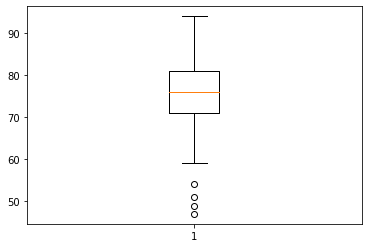

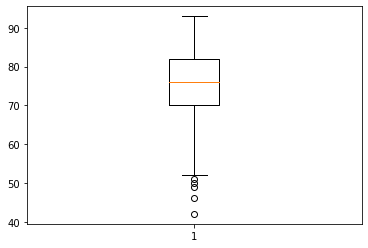

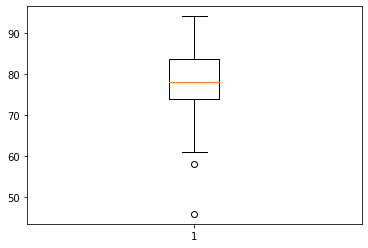

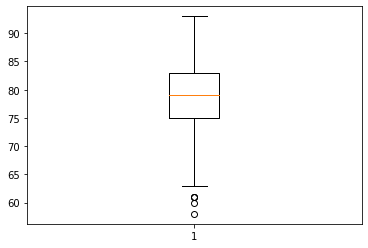

In [4]:

plt.boxplot(df['lembap18'])
plt.show()
plt.boxplot(df['lembap19'])
plt.show()
plt.boxplot(df['lembap20'])
plt.show()
plt.boxplot(df['lembap21'])
plt.show()

In [5]:
Q1 = df['lembap18'].quantile(0.25)
Q3 = df['lembap18'].quantile(0.75)
IQR = Q3 - Q1

df = df[~((df['lembap18'] < (Q1 - 1.5 * IQR)) |(df['lembap18'] > (Q3 + 1.5 * IQR)))]

In [6]:
Q1 = df['lembap19'].quantile(0.25)
Q3 = df['lembap19'].quantile(0.75)
IQR = Q3 - Q1

df = df[~((df['lembap19'] < (Q1 - 1.5 * IQR)) |(df['lembap19'] > (Q3 + 1.5 * IQR)))]

In [7]:
Q1 = df['lembap20'].quantile(0.25)
Q3 = df['lembap20'].quantile(0.75)
IQR = Q3 - Q1

df = df[~((df['lembap20'] < (Q1 - 1.5 * IQR)) |(df['lembap20'] > (Q3 + 1.5 * IQR)))]

In [8]:
Q1 = df['lembap21'].quantile(0.25)
Q3 = df['lembap21'].quantile(0.75)
IQR = Q3 - Q1

df = df[~((df['lembap21'] < (Q1 - 1.5 * IQR)) |(df['lembap21'] > (Q3 + 1.5 * IQR)))]

In [9]:
df = df.dropna(axis=0) #drop nilai 0
display(df.info())
display(df)
#df.to_excel('cleansingLembapRaw.xlsx')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 336 entries, 0 to 364
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   lembap18  336 non-null    int64  
 1   lembap19  336 non-null    int64  
 2   lembap20  336 non-null    float64
 3   lembap21  336 non-null    float64
dtypes: float64(2), int64(2)
memory usage: 13.1 KB


None

,lembap18,lembap19,lembap20,lembap21
0,78,79,88.0,76.0
1,80,74,84.0,68.0
2,84,76,76.0,74.0
3,88,69,78.0,79.0
4,81,70,81.0,80.0
...,...,...,...,...
360,80,93,78.0,80.0
361,76,92,72.0,78.0
362,69,78,76.0,80.0
363,66,80,76.0,80.0


In [2]:
df = pd.read_excel('cleansingKelembapanFix.xlsx')
display(df)

,x,y
0,78,80
1,80,84
2,84,88
3,88,81
4,81,73
...,...,...
1339,80,78
1340,78,80
1341,80,80
1342,80,79


In [3]:
x = df.iloc[:,0:1].values
y = df.iloc[:,-1].values

In [4]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.75, random_state=0)

In [24]:
import tensorflow as tf #bpnn

model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Dense(units=1, activation='relu'))
model.add(tf.keras.layers.Dense(units=6, activation='relu'))
model.add(tf.keras.layers.Dense(units=1))
model.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(0.001))

model.fit(x_train, y_train, epochs=10000, batch_size=100)

Epoch 1/10000
11/11 [==============================] - 0s 2ms/step - loss: 878.4109
Epoch 2/10000
11/11 [==============================] - 0s 1ms/step - loss: 719.8901
Epoch 3/10000
11/11 [==============================] - 0s 1ms/step - loss: 575.7881
Epoch 4/10000
11/11 [==============================] - 0s 1ms/step - loss: 447.4973
Epoch 5/10000
11/11 [==============================] - 0s 1ms/step - loss: 338.0405
Epoch 6/10000
11/11 [==============================] - 0s 1ms/step - loss: 247.4047
Epoch 7/10000
11/11 [==============================] - 0s 1ms/step - loss: 176.9796
Epoch 8/10000
11/11 [==============================] - 0s 1ms/step - loss: 123.9010
Epoch 9/10000
11/11 [==============================] - 0s 1ms/step - loss: 86.1087
Epoch 10/10000
11/11 [==============================] - 0s 1ms/step - loss: 61.2624
Epoch 11/10000
11/11 [==============================] - 0s 1ms/step - loss: 45.8284
Epoch 12/10000
11/11 [==============================] - 0s 1ms/step - loss: 3

11/11 [==============================] - 0s 1ms/step - loss: 28.8887
Epoch 195/10000
11/11 [==============================] - 0s 2ms/step - loss: 28.8448
Epoch 196/10000
11/11 [==============================] - 0s 1ms/step - loss: 28.9423
Epoch 197/10000
11/11 [==============================] - 0s 1ms/step - loss: 28.8104
Epoch 198/10000
11/11 [==============================] - 0s 1ms/step - loss: 28.8828
Epoch 199/10000
11/11 [==============================] - 0s 1ms/step - loss: 28.8932
Epoch 200/10000
11/11 [==============================] - 0s 0s/step - loss: 28.8583
Epoch 201/10000
11/11 [==============================] - 0s 0s/step - loss: 28.8303
Epoch 202/10000
11/11 [==============================] - 0s 2ms/step - loss: 28.8586
Epoch 203/10000
11/11 [==============================] - 0s 2ms/step - loss: 28.8715
Epoch 204/10000
11/11 [==============================] - 0s 2ms/step - loss: 28.8778
Epoch 205/10000
11/11 [==============================] - 0s 2ms/step - loss: 28.887

11/11 [==============================] - 0s 2ms/step - loss: 28.5666
Epoch 387/10000
11/11 [==============================] - 0s 1ms/step - loss: 28.6783
Epoch 388/10000
11/11 [==============================] - 0s 529us/step - loss: 28.6821
Epoch 389/10000
11/11 [==============================] - 0s 2ms/step - loss: 28.6360
Epoch 390/10000
11/11 [==============================] - 0s 1000us/step - loss: 28.5277
Epoch 391/10000
11/11 [==============================] - 0s 1ms/step - loss: 28.5480
Epoch 392/10000
11/11 [==============================] - 0s 1ms/step - loss: 28.5401
Epoch 393/10000
11/11 [==============================] - 0s 1ms/step - loss: 28.6101
Epoch 394/10000
11/11 [==============================] - 0s 1ms/step - loss: 28.4966
Epoch 395/10000
11/11 [==============================] - 0s 1ms/step - loss: 28.5679
Epoch 396/10000
11/11 [==============================] - 0s 1ms/step - loss: 28.5275
Epoch 397/10000
11/11 [==============================] - 0s 1ms/step - loss:

11/11 [==============================] - 0s 1ms/step - loss: 28.1700
Epoch 579/10000
11/11 [==============================] - 0s 1ms/step - loss: 28.1279
Epoch 580/10000
11/11 [==============================] - 0s 999us/step - loss: 28.1486
Epoch 581/10000
11/11 [==============================] - 0s 1ms/step - loss: 28.1591
Epoch 582/10000
11/11 [==============================] - 0s 1ms/step - loss: 28.1661
Epoch 583/10000
11/11 [==============================] - 0s 1ms/step - loss: 28.2031
Epoch 584/10000
11/11 [==============================] - 0s 1ms/step - loss: 28.1233
Epoch 585/10000
11/11 [==============================] - 0s 1ms/step - loss: 28.2657
Epoch 586/10000
11/11 [==============================] - 0s 1ms/step - loss: 28.1595
Epoch 587/10000
11/11 [==============================] - 0s 1ms/step - loss: 28.1188
Epoch 588/10000
11/11 [==============================] - 0s 1ms/step - loss: 28.1077
Epoch 589/10000
11/11 [==============================] - 0s 1ms/step - loss: 28

11/11 [==============================] - 0s 1ms/step - loss: 27.6915
Epoch 771/10000
11/11 [==============================] - 0s 1ms/step - loss: 27.6861
Epoch 772/10000
11/11 [==============================] - 0s 999us/step - loss: 27.8141
Epoch 773/10000
11/11 [==============================] - 0s 1ms/step - loss: 27.7818
Epoch 774/10000
11/11 [==============================] - 0s 1ms/step - loss: 27.6951
Epoch 775/10000
11/11 [==============================] - 0s 1ms/step - loss: 27.7744
Epoch 776/10000
11/11 [==============================] - 0s 1ms/step - loss: 27.9904
Epoch 777/10000
11/11 [==============================] - 0s 1ms/step - loss: 27.8123
Epoch 778/10000
11/11 [==============================] - 0s 1ms/step - loss: 27.9234
Epoch 779/10000
11/11 [==============================] - 0s 1ms/step - loss: 27.8966
Epoch 780/10000
11/11 [==============================] - 0s 1ms/step - loss: 27.6979
Epoch 781/10000
11/11 [==============================] - 0s 1ms/step - loss: 27

11/11 [==============================] - 0s 1ms/step - loss: 27.5843
Epoch 963/10000
11/11 [==============================] - 0s 1ms/step - loss: 27.4135
Epoch 964/10000
11/11 [==============================] - 0s 1ms/step - loss: 27.3997
Epoch 965/10000
11/11 [==============================] - 0s 1ms/step - loss: 27.4509
Epoch 966/10000
11/11 [==============================] - 0s 1ms/step - loss: 27.4022
Epoch 967/10000
11/11 [==============================] - 0s 999us/step - loss: 27.5157
Epoch 968/10000
11/11 [==============================] - 0s 1ms/step - loss: 27.3120
Epoch 969/10000
11/11 [==============================] - 0s 1ms/step - loss: 27.4254
Epoch 970/10000
11/11 [==============================] - 0s 1ms/step - loss: 27.4147
Epoch 971/10000
11/11 [==============================] - 0s 1ms/step - loss: 27.5053
Epoch 972/10000
11/11 [==============================] - 0s 1ms/step - loss: 27.3659
Epoch 973/10000
11/11 [==============================] - 0s 1ms/step - loss: 27

11/11 [==============================] - 0s 999us/step - loss: 27.1346
Epoch 1153/10000
11/11 [==============================] - 0s 1ms/step - loss: 27.0125
Epoch 1154/10000
11/11 [==============================] - 0s 1ms/step - loss: 27.1525
Epoch 1155/10000
11/11 [==============================] - 0s 1ms/step - loss: 27.0065
Epoch 1156/10000
11/11 [==============================] - 0s 1ms/step - loss: 27.0135
Epoch 1157/10000
11/11 [==============================] - 0s 999us/step - loss: 27.1619
Epoch 1158/10000
11/11 [==============================] - 0s 1ms/step - loss: 27.0639
Epoch 1159/10000
11/11 [==============================] - 0s 1ms/step - loss: 27.2313
Epoch 1160/10000
11/11 [==============================] - 0s 1ms/step - loss: 27.1805
Epoch 1161/10000
11/11 [==============================] - 0s 1ms/step - loss: 27.0512
Epoch 1162/10000
11/11 [==============================] - 0s 1ms/step - loss: 27.0017
Epoch 1163/10000
11/11 [==============================] - 0s 1ms/st

11/11 [==============================] - 0s 0s/step - loss: 26.7550
Epoch 1343/10000
11/11 [==============================] - 0s 0s/step - loss: 26.7422
Epoch 1344/10000
11/11 [==============================] - 0s 105us/step - loss: 26.7115
Epoch 1345/10000
11/11 [==============================] - 0s 2ms/step - loss: 26.7336
Epoch 1346/10000
11/11 [==============================] - 0s 2ms/step - loss: 26.9906
Epoch 1347/10000
11/11 [==============================] - 0s 1ms/step - loss: 26.7545
Epoch 1348/10000
11/11 [==============================] - 0s 1ms/step - loss: 26.8186
Epoch 1349/10000
11/11 [==============================] - 0s 1ms/step - loss: 26.7448
Epoch 1350/10000
11/11 [==============================] - 0s 1ms/step - loss: 26.7693
Epoch 1351/10000
11/11 [==============================] - 0s 1ms/step - loss: 26.8156
Epoch 1352/10000
11/11 [==============================] - 0s 1ms/step - loss: 26.7274
Epoch 1353/10000
11/11 [==============================] - 0s 1ms/step -

11/11 [==============================] - 0s 1ms/step - loss: 26.5137
Epoch 1533/10000
11/11 [==============================] - 0s 1ms/step - loss: 26.4927
Epoch 1534/10000
11/11 [==============================] - 0s 1ms/step - loss: 26.4377
Epoch 1535/10000
11/11 [==============================] - 0s 1ms/step - loss: 26.4575
Epoch 1536/10000
11/11 [==============================] - 0s 1ms/step - loss: 26.4522
Epoch 1537/10000
11/11 [==============================] - 0s 1ms/step - loss: 26.4861
Epoch 1538/10000
11/11 [==============================] - 0s 1ms/step - loss: 26.4927
Epoch 1539/10000
11/11 [==============================] - 0s 1ms/step - loss: 26.8193
Epoch 1540/10000
11/11 [==============================] - 0s 1ms/step - loss: 26.5366
Epoch 1541/10000
11/11 [==============================] - 0s 1ms/step - loss: 26.4913
Epoch 1542/10000
11/11 [==============================] - 0s 1ms/step - loss: 26.4248
Epoch 1543/10000
11/11 [==============================] - 0s 1ms/step -

11/11 [==============================] - 0s 1ms/step - loss: 26.5715
Epoch 1723/10000
11/11 [==============================] - 0s 1ms/step - loss: 26.3837
Epoch 1724/10000
11/11 [==============================] - 0s 1ms/step - loss: 26.1829
Epoch 1725/10000
11/11 [==============================] - 0s 1ms/step - loss: 26.3662
Epoch 1726/10000
11/11 [==============================] - 0s 1ms/step - loss: 26.2591
Epoch 1727/10000
11/11 [==============================] - 0s 1ms/step - loss: 26.1945
Epoch 1728/10000
11/11 [==============================] - 0s 1ms/step - loss: 26.2609
Epoch 1729/10000
11/11 [==============================] - 0s 1ms/step - loss: 26.2306
Epoch 1730/10000
11/11 [==============================] - 0s 1ms/step - loss: 26.2419
Epoch 1731/10000
11/11 [==============================] - 0s 1ms/step - loss: 26.2274
Epoch 1732/10000
11/11 [==============================] - 0s 1ms/step - loss: 26.2189
Epoch 1733/10000
11/11 [==============================] - 0s 1ms/step -

11/11 [==============================] - 0s 1ms/step - loss: 26.3181
Epoch 1913/10000
11/11 [==============================] - 0s 1ms/step - loss: 26.2933
Epoch 1914/10000
11/11 [==============================] - 0s 1ms/step - loss: 26.4222
Epoch 1915/10000
11/11 [==============================] - 0s 1ms/step - loss: 26.0537
Epoch 1916/10000
11/11 [==============================] - 0s 1ms/step - loss: 26.0448
Epoch 1917/10000
11/11 [==============================] - 0s 1ms/step - loss: 26.0535
Epoch 1918/10000
11/11 [==============================] - 0s 1ms/step - loss: 26.0567
Epoch 1919/10000
11/11 [==============================] - 0s 1ms/step - loss: 26.2154
Epoch 1920/10000
11/11 [==============================] - 0s 1ms/step - loss: 26.0341
Epoch 1921/10000
11/11 [==============================] - 0s 1ms/step - loss: 26.0390
Epoch 1922/10000
11/11 [==============================] - 0s 637us/step - loss: 25.9987
Epoch 1923/10000
11/11 [==============================] - 0s 2ms/step

11/11 [==============================] - 0s 1ms/step - loss: 25.9446
Epoch 2103/10000
11/11 [==============================] - 0s 1ms/step - loss: 25.8530
Epoch 2104/10000
11/11 [==============================] - 0s 1ms/step - loss: 25.9050
Epoch 2105/10000
11/11 [==============================] - 0s 1ms/step - loss: 25.8095
Epoch 2106/10000
11/11 [==============================] - 0s 1ms/step - loss: 25.8582
Epoch 2107/10000
11/11 [==============================] - 0s 1ms/step - loss: 25.8964
Epoch 2108/10000
11/11 [==============================] - 0s 1ms/step - loss: 25.8645
Epoch 2109/10000
11/11 [==============================] - 0s 1ms/step - loss: 25.8994
Epoch 2110/10000
11/11 [==============================] - 0s 1ms/step - loss: 26.1447
Epoch 2111/10000
11/11 [==============================] - 0s 1ms/step - loss: 25.9468
Epoch 2112/10000
11/11 [==============================] - 0s 1ms/step - loss: 25.8656
Epoch 2113/10000
11/11 [==============================] - 0s 1ms/step -

11/11 [==============================] - 0s 1ms/step - loss: 25.8617
Epoch 2293/10000
11/11 [==============================] - 0s 1ms/step - loss: 25.7208
Epoch 2294/10000
11/11 [==============================] - 0s 821us/step - loss: 25.7428
Epoch 2295/10000
11/11 [==============================] - 0s 2ms/step - loss: 25.7378
Epoch 2296/10000
11/11 [==============================] - 0s 1ms/step - loss: 25.7208
Epoch 2297/10000
11/11 [==============================] - 0s 1ms/step - loss: 25.9788
Epoch 2298/10000
11/11 [==============================] - 0s 1ms/step - loss: 25.6511
Epoch 2299/10000
11/11 [==============================] - 0s 1ms/step - loss: 26.1710
Epoch 2300/10000
11/11 [==============================] - 0s 1ms/step - loss: 25.7186
Epoch 2301/10000
11/11 [==============================] - 0s 1ms/step - loss: 25.7974
Epoch 2302/10000
11/11 [==============================] - 0s 711us/step - loss: 25.6202
Epoch 2303/10000
11/11 [==============================] - 0s 2ms/st

11/11 [==============================] - 0s 1ms/step - loss: 25.7206
Epoch 2388/10000
11/11 [==============================] - 0s 1ms/step - loss: 25.6997
Epoch 2389/10000
11/11 [==============================] - 0s 1ms/step - loss: 25.5978
Epoch 2390/10000
11/11 [==============================] - 0s 1ms/step - loss: 25.5957
Epoch 2391/10000
11/11 [==============================] - 0s 1ms/step - loss: 25.5981
Epoch 2392/10000
11/11 [==============================] - 0s 1ms/step - loss: 25.5790
Epoch 2393/10000
11/11 [==============================] - 0s 1ms/step - loss: 25.6860
Epoch 2394/10000
11/11 [==============================] - 0s 1000us/step - loss: 25.5755
Epoch 2395/10000
11/11 [==============================] - 0s 1ms/step - loss: 25.5928
Epoch 2396/10000
11/11 [==============================] - 0s 1ms/step - loss: 25.5923
Epoch 2397/10000
11/11 [==============================] - 0s 1ms/step - loss: 25.5812
Epoch 2398/10000
11/11 [==============================] - 0s 999us/s

11/11 [==============================] - 0s 2ms/step - loss: 25.5397
Epoch 2578/10000
11/11 [==============================] - 0s 2ms/step - loss: 25.4818
Epoch 2579/10000
11/11 [==============================] - 0s 2ms/step - loss: 25.4691
Epoch 2580/10000
11/11 [==============================] - 0s 2ms/step - loss: 25.4896
Epoch 2581/10000
11/11 [==============================] - 0s 0s/step - loss: 25.5028
Epoch 2582/10000
11/11 [==============================] - 0s 0s/step - loss: 25.5216
Epoch 2583/10000
11/11 [==============================] - 0s 0s/step - loss: 25.6312
Epoch 2584/10000
11/11 [==============================] - 0s 2ms/step - loss: 25.4425
Epoch 2585/10000
11/11 [==============================] - 0s 2ms/step - loss: 25.4640
Epoch 2586/10000
11/11 [==============================] - 0s 2ms/step - loss: 25.5251
Epoch 2587/10000
11/11 [==============================] - 0s 2ms/step - loss: 25.4905
Epoch 2588/10000
11/11 [==============================] - 0s 2ms/step - lo

11/11 [==============================] - 0s 1ms/step - loss: 25.5223
Epoch 2768/10000
11/11 [==============================] - 0s 1ms/step - loss: 25.4139
Epoch 2769/10000
11/11 [==============================] - 0s 1ms/step - loss: 25.3892
Epoch 2770/10000
11/11 [==============================] - 0s 1ms/step - loss: 25.4162
Epoch 2771/10000
11/11 [==============================] - 0s 1ms/step - loss: 25.3656
Epoch 2772/10000
11/11 [==============================] - 0s 1ms/step - loss: 25.3400
Epoch 2773/10000
11/11 [==============================] - 0s 1ms/step - loss: 25.3886
Epoch 2774/10000
11/11 [==============================] - 0s 1ms/step - loss: 25.3583
Epoch 2775/10000
11/11 [==============================] - 0s 1ms/step - loss: 25.3778
Epoch 2776/10000
11/11 [==============================] - 0s 1ms/step - loss: 25.5332
Epoch 2777/10000
11/11 [==============================] - 0s 1ms/step - loss: 25.4595
Epoch 2778/10000
11/11 [==============================] - 0s 1ms/step -

11/11 [==============================] - 0s 1ms/step - loss: 25.5112
Epoch 2958/10000
11/11 [==============================] - 0s 1ms/step - loss: 25.3776
Epoch 2959/10000
11/11 [==============================] - 0s 1ms/step - loss: 25.2921
Epoch 2960/10000
11/11 [==============================] - 0s 1ms/step - loss: 25.4212
Epoch 2961/10000
11/11 [==============================] - 0s 1000us/step - loss: 25.2821
Epoch 2962/10000
11/11 [==============================] - 0s 999us/step - loss: 25.3644
Epoch 2963/10000
11/11 [==============================] - 0s 1ms/step - loss: 25.5042
Epoch 2964/10000
11/11 [==============================] - 0s 1ms/step - loss: 25.3925
Epoch 2965/10000
11/11 [==============================] - 0s 1ms/step - loss: 25.2261
Epoch 2966/10000
11/11 [==============================] - 0s 1ms/step - loss: 25.5500
Epoch 2967/10000
11/11 [==============================] - 0s 1ms/step - loss: 25.3386
Epoch 2968/10000
11/11 [==============================] - 0s 1ms/s

11/11 [==============================] - 0s 999us/step - loss: 25.1997
Epoch 3148/10000
11/11 [==============================] - 0s 1ms/step - loss: 25.2174
Epoch 3149/10000
11/11 [==============================] - 0s 1ms/step - loss: 25.1749
Epoch 3150/10000
11/11 [==============================] - 0s 1000us/step - loss: 25.1675
Epoch 3151/10000
11/11 [==============================] - 0s 1ms/step - loss: 25.3583
Epoch 3152/10000
11/11 [==============================] - 0s 1ms/step - loss: 25.2383
Epoch 3153/10000
11/11 [==============================] - 0s 1ms/step - loss: 25.3111
Epoch 3154/10000
11/11 [==============================] - 0s 1ms/step - loss: 25.2969
Epoch 3155/10000
11/11 [==============================] - 0s 1ms/step - loss: 25.4149
Epoch 3156/10000
11/11 [==============================] - 0s 1ms/step - loss: 25.2364
Epoch 3157/10000
11/11 [==============================] - 0s 999us/step - loss: 25.1765
Epoch 3158/10000
11/11 [==============================] - 0s 1ms

11/11 [==============================] - 0s 1ms/step - loss: 25.2448
Epoch 3338/10000
11/11 [==============================] - 0s 1ms/step - loss: 25.4272
Epoch 3339/10000
11/11 [==============================] - 0s 1ms/step - loss: 25.1850
Epoch 3340/10000
11/11 [==============================] - 0s 1ms/step - loss: 25.2372
Epoch 3341/10000
11/11 [==============================] - 0s 1ms/step - loss: 25.1273
Epoch 3342/10000
11/11 [==============================] - 0s 1ms/step - loss: 25.1110
Epoch 3343/10000
11/11 [==============================] - 0s 1ms/step - loss: 25.3480
Epoch 3344/10000
11/11 [==============================] - 0s 998us/step - loss: 25.1680
Epoch 3345/10000
11/11 [==============================] - 0s 1ms/step - loss: 25.0885
Epoch 3346/10000
11/11 [==============================] - 0s 1ms/step - loss: 25.2569
Epoch 3347/10000
11/11 [==============================] - 0s 1ms/step - loss: 25.1321
Epoch 3348/10000
11/11 [==============================] - 0s 1000us/s

11/11 [==============================] - 0s 1ms/step - loss: 25.8751
Epoch 3528/10000
11/11 [==============================] - 0s 1ms/step - loss: 25.2104
Epoch 3529/10000
11/11 [==============================] - 0s 1ms/step - loss: 25.2118
Epoch 3530/10000
11/11 [==============================] - 0s 1ms/step - loss: 25.1755
Epoch 3531/10000
11/11 [==============================] - 0s 1ms/step - loss: 25.1161
Epoch 3532/10000
11/11 [==============================] - 0s 1ms/step - loss: 25.3610
Epoch 3533/10000
11/11 [==============================] - 0s 1ms/step - loss: 25.0756
Epoch 3534/10000
11/11 [==============================] - 0s 1ms/step - loss: 25.1286
Epoch 3535/10000
11/11 [==============================] - 0s 1ms/step - loss: 25.0822
Epoch 3536/10000
11/11 [==============================] - 0s 1ms/step - loss: 25.0415
Epoch 3537/10000
11/11 [==============================] - 0s 1ms/step - loss: 25.0832
Epoch 3538/10000
11/11 [==============================] - 0s 1ms/step -

11/11 [==============================] - 0s 0s/step - loss: 25.0481
Epoch 3718/10000
11/11 [==============================] - 0s 2ms/step - loss: 24.9960
Epoch 3719/10000
11/11 [==============================] - 0s 2ms/step - loss: 25.0019
Epoch 3720/10000
11/11 [==============================] - 0s 2ms/step - loss: 25.3267
Epoch 3721/10000
11/11 [==============================] - 0s 1ms/step - loss: 25.0346
Epoch 3722/10000
11/11 [==============================] - 0s 1ms/step - loss: 25.1886
Epoch 3723/10000
11/11 [==============================] - 0s 1ms/step - loss: 25.0672
Epoch 3724/10000
11/11 [==============================] - 0s 1ms/step - loss: 25.0612
Epoch 3725/10000
11/11 [==============================] - 0s 1ms/step - loss: 25.1719
Epoch 3726/10000
11/11 [==============================] - 0s 1ms/step - loss: 25.0300
Epoch 3727/10000
11/11 [==============================] - 0s 1ms/step - loss: 24.9974
Epoch 3728/10000
11/11 [==============================] - 0s 1ms/step - 

11/11 [==============================] - 0s 1ms/step - loss: 24.9559
Epoch 3908/10000
11/11 [==============================] - 0s 1ms/step - loss: 25.0007
Epoch 3909/10000
11/11 [==============================] - 0s 1ms/step - loss: 24.9640
Epoch 3910/10000
11/11 [==============================] - 0s 1ms/step - loss: 25.0621
Epoch 3911/10000
11/11 [==============================] - 0s 1ms/step - loss: 24.9856
Epoch 3912/10000
11/11 [==============================] - 0s 1ms/step - loss: 24.9855
Epoch 3913/10000
11/11 [==============================] - 0s 1ms/step - loss: 24.9633
Epoch 3914/10000
11/11 [==============================] - 0s 1ms/step - loss: 25.0264
Epoch 3915/10000
11/11 [==============================] - 0s 1ms/step - loss: 24.9810
Epoch 3916/10000
11/11 [==============================] - 0s 1ms/step - loss: 24.9983
Epoch 3917/10000
11/11 [==============================] - 0s 1ms/step - loss: 24.9609
Epoch 3918/10000
11/11 [==============================] - 0s 1ms/step -

11/11 [==============================] - 0s 1ms/step - loss: 24.9272
Epoch 4098/10000
11/11 [==============================] - 0s 1ms/step - loss: 24.9768
Epoch 4099/10000
11/11 [==============================] - 0s 1ms/step - loss: 25.0038
Epoch 4100/10000
11/11 [==============================] - 0s 1ms/step - loss: 24.9732
Epoch 4101/10000
11/11 [==============================] - 0s 1ms/step - loss: 24.9620
Epoch 4102/10000
11/11 [==============================] - 0s 1ms/step - loss: 24.9453
Epoch 4103/10000
11/11 [==============================] - 0s 1ms/step - loss: 25.0077
Epoch 4104/10000
11/11 [==============================] - 0s 1ms/step - loss: 24.9774
Epoch 4105/10000
11/11 [==============================] - 0s 1ms/step - loss: 24.9753
Epoch 4106/10000
11/11 [==============================] - 0s 1ms/step - loss: 24.9392
Epoch 4107/10000
11/11 [==============================] - 0s 1ms/step - loss: 24.9603
Epoch 4108/10000
11/11 [==============================] - 0s 1ms/step -

11/11 [==============================] - 0s 2ms/step - loss: 24.9613
Epoch 4288/10000
11/11 [==============================] - 0s 2ms/step - loss: 24.9758
Epoch 4289/10000
11/11 [==============================] - 0s 2ms/step - loss: 24.9518
Epoch 4290/10000
11/11 [==============================] - 0s 2ms/step - loss: 24.9218
Epoch 4291/10000
11/11 [==============================] - 0s 2ms/step - loss: 25.1703
Epoch 4292/10000
11/11 [==============================] - 0s 2ms/step - loss: 25.7697
Epoch 4293/10000
11/11 [==============================] - 0s 1ms/step - loss: 25.4222
Epoch 4294/10000
11/11 [==============================] - 0s 1ms/step - loss: 24.9634
Epoch 4295/10000
11/11 [==============================] - 0s 2ms/step - loss: 25.3206
Epoch 4296/10000
11/11 [==============================] - 0s 2ms/step - loss: 24.9404
Epoch 4297/10000
11/11 [==============================] - 0s 2ms/step - loss: 24.9131
Epoch 4298/10000
11/11 [==============================] - 0s 2ms/step -

11/11 [==============================] - 0s 2ms/step - loss: 25.1542
Epoch 4478/10000
11/11 [==============================] - 0s 1ms/step - loss: 25.0016
Epoch 4479/10000
11/11 [==============================] - 0s 1ms/step - loss: 24.9707
Epoch 4480/10000
11/11 [==============================] - 0s 1ms/step - loss: 25.0075
Epoch 4481/10000
11/11 [==============================] - 0s 1ms/step - loss: 24.9319
Epoch 4482/10000
11/11 [==============================] - 0s 1ms/step - loss: 25.0419
Epoch 4483/10000
11/11 [==============================] - 0s 1ms/step - loss: 24.9103
Epoch 4484/10000
11/11 [==============================] - 0s 1ms/step - loss: 24.8899
Epoch 4485/10000
11/11 [==============================] - 0s 1ms/step - loss: 24.9057
Epoch 4486/10000
11/11 [==============================] - 0s 1ms/step - loss: 24.9211
Epoch 4487/10000
11/11 [==============================] - 0s 1ms/step - loss: 24.9966
Epoch 4488/10000
11/11 [==============================] - 0s 1ms/step -

11/11 [==============================] - 0s 2ms/step - loss: 25.0608
Epoch 4668/10000
11/11 [==============================] - 0s 2ms/step - loss: 24.9312
Epoch 4669/10000
11/11 [==============================] - 0s 2ms/step - loss: 24.9236
Epoch 4670/10000
11/11 [==============================] - 0s 2ms/step - loss: 24.9840
Epoch 4671/10000
11/11 [==============================] - 0s 2ms/step - loss: 24.9534
Epoch 4672/10000
11/11 [==============================] - 0s 2ms/step - loss: 24.8927
Epoch 4673/10000
11/11 [==============================] - 0s 2ms/step - loss: 24.8917
Epoch 4674/10000
11/11 [==============================] - 0s 2ms/step - loss: 24.9636
Epoch 4675/10000
11/11 [==============================] - 0s 2ms/step - loss: 24.8934
Epoch 4676/10000
11/11 [==============================] - 0s 2ms/step - loss: 24.9223
Epoch 4677/10000
11/11 [==============================] - 0s 2ms/step - loss: 24.8965
Epoch 4678/10000
11/11 [==============================] - 0s 2ms/step -

11/11 [==============================] - 0s 2ms/step - loss: 24.9573
Epoch 4858/10000
11/11 [==============================] - 0s 2ms/step - loss: 24.8981
Epoch 4859/10000
11/11 [==============================] - 0s 2ms/step - loss: 25.1275
Epoch 4860/10000
11/11 [==============================] - 0s 1ms/step - loss: 25.0205
Epoch 4861/10000
11/11 [==============================] - 0s 2ms/step - loss: 24.9690
Epoch 4862/10000
11/11 [==============================] - 0s 2ms/step - loss: 24.9553
Epoch 4863/10000
11/11 [==============================] - 0s 2ms/step - loss: 24.9278
Epoch 4864/10000
11/11 [==============================] - 0s 1ms/step - loss: 24.9406
Epoch 4865/10000
11/11 [==============================] - 0s 1ms/step - loss: 24.9021
Epoch 4866/10000
11/11 [==============================] - 0s 1ms/step - loss: 24.9683
Epoch 4867/10000
11/11 [==============================] - 0s 2ms/step - loss: 24.8651
Epoch 4868/10000
11/11 [==============================] - 0s 1ms/step -

11/11 [==============================] - 0s 2ms/step - loss: 24.8880
Epoch 5048/10000
11/11 [==============================] - 0s 1ms/step - loss: 24.8670
Epoch 5049/10000
11/11 [==============================] - 0s 1ms/step - loss: 24.8846
Epoch 5050/10000
11/11 [==============================] - 0s 1ms/step - loss: 24.8800
Epoch 5051/10000
11/11 [==============================] - 0s 1ms/step - loss: 24.9119
Epoch 5052/10000
11/11 [==============================] - 0s 1ms/step - loss: 25.0668
Epoch 5053/10000
11/11 [==============================] - 0s 1ms/step - loss: 24.8578
Epoch 5054/10000
11/11 [==============================] - 0s 1ms/step - loss: 24.8760
Epoch 5055/10000
11/11 [==============================] - 0s 1ms/step - loss: 24.8787
Epoch 5056/10000
11/11 [==============================] - 0s 1ms/step - loss: 25.1751
Epoch 5057/10000
11/11 [==============================] - 0s 1ms/step - loss: 24.9461
Epoch 5058/10000
11/11 [==============================] - 0s 1ms/step -

11/11 [==============================] - 0s 0s/step - loss: 24.9615
Epoch 5238/10000
11/11 [==============================] - 0s 2ms/step - loss: 24.9043
Epoch 5239/10000
11/11 [==============================] - 0s 2ms/step - loss: 24.9339
Epoch 5240/10000
11/11 [==============================] - 0s 1ms/step - loss: 24.8561
Epoch 5241/10000
11/11 [==============================] - 0s 1ms/step - loss: 24.9860
Epoch 5242/10000
11/11 [==============================] - 0s 1ms/step - loss: 24.8702
Epoch 5243/10000
11/11 [==============================] - 0s 1ms/step - loss: 24.9270
Epoch 5244/10000
11/11 [==============================] - 0s 1ms/step - loss: 25.1185
Epoch 5245/10000
11/11 [==============================] - 0s 1ms/step - loss: 24.9931
Epoch 5246/10000
11/11 [==============================] - 0s 1ms/step - loss: 24.9649
Epoch 5247/10000
11/11 [==============================] - 0s 1ms/step - loss: 24.9055
Epoch 5248/10000
11/11 [==============================] - 0s 1ms/step - 

11/11 [==============================] - 0s 2ms/step - loss: 24.8539
Epoch 5428/10000
11/11 [==============================] - 0s 2ms/step - loss: 25.3525
Epoch 5429/10000
11/11 [==============================] - 0s 2ms/step - loss: 24.8892
Epoch 5430/10000
11/11 [==============================] - 0s 2ms/step - loss: 24.8947
Epoch 5431/10000
11/11 [==============================] - 0s 1ms/step - loss: 24.8914
Epoch 5432/10000
11/11 [==============================] - 0s 1ms/step - loss: 24.9825
Epoch 5433/10000
11/11 [==============================] - 0s 1ms/step - loss: 25.1295
Epoch 5434/10000
11/11 [==============================] - 0s 1ms/step - loss: 25.0644
Epoch 5435/10000
11/11 [==============================] - 0s 1ms/step - loss: 24.9010
Epoch 5436/10000
11/11 [==============================] - 0s 1ms/step - loss: 24.8545
Epoch 5437/10000
11/11 [==============================] - 0s 1ms/step - loss: 24.8303
Epoch 5438/10000
11/11 [==============================] - 0s 1ms/step -

11/11 [==============================] - 0s 2ms/step - loss: 24.9439
Epoch 5618/10000
11/11 [==============================] - 0s 2ms/step - loss: 24.9875
Epoch 5619/10000
11/11 [==============================] - 0s 1ms/step - loss: 24.8647
Epoch 5620/10000
11/11 [==============================] - 0s 2ms/step - loss: 24.9172
Epoch 5621/10000
11/11 [==============================] - 0s 2ms/step - loss: 24.9496
Epoch 5622/10000
11/11 [==============================] - 0s 2ms/step - loss: 24.8846
Epoch 5623/10000
11/11 [==============================] - 0s 2ms/step - loss: 24.9648
Epoch 5624/10000
11/11 [==============================] - 0s 2ms/step - loss: 25.1217
Epoch 5625/10000
11/11 [==============================] - 0s 2ms/step - loss: 24.8893
Epoch 5626/10000
11/11 [==============================] - 0s 2ms/step - loss: 24.8937
Epoch 5627/10000
11/11 [==============================] - 0s 1ms/step - loss: 24.8544
Epoch 5628/10000
11/11 [==============================] - 0s 2ms/step -

11/11 [==============================] - 0s 2ms/step - loss: 24.8987
Epoch 5808/10000
11/11 [==============================] - 0s 2ms/step - loss: 24.8890
Epoch 5809/10000
11/11 [==============================] - 0s 2ms/step - loss: 25.3723
Epoch 5810/10000
11/11 [==============================] - 0s 2ms/step - loss: 24.9050
Epoch 5811/10000
11/11 [==============================] - 0s 2ms/step - loss: 24.9806
Epoch 5812/10000
11/11 [==============================] - 0s 2ms/step - loss: 25.0475
Epoch 5813/10000
11/11 [==============================] - 0s 2ms/step - loss: 24.8132
Epoch 5814/10000
11/11 [==============================] - 0s 1ms/step - loss: 24.9869
Epoch 5815/10000
11/11 [==============================] - 0s 2ms/step - loss: 24.8625
Epoch 5816/10000
11/11 [==============================] - 0s 2ms/step - loss: 24.8475
Epoch 5817/10000
11/11 [==============================] - 0s 2ms/step - loss: 24.8769
Epoch 5818/10000
11/11 [==============================] - 0s 1ms/step -

11/11 [==============================] - 0s 1ms/step - loss: 24.9884
Epoch 5998/10000
11/11 [==============================] - 0s 1ms/step - loss: 24.9276
Epoch 5999/10000
11/11 [==============================] - 0s 1ms/step - loss: 24.9037
Epoch 6000/10000
11/11 [==============================] - 0s 1ms/step - loss: 25.0651
Epoch 6001/10000
11/11 [==============================] - 0s 1ms/step - loss: 24.9267
Epoch 6002/10000
11/11 [==============================] - 0s 1ms/step - loss: 24.8680
Epoch 6003/10000
11/11 [==============================] - 0s 999us/step - loss: 25.0496
Epoch 6004/10000
11/11 [==============================] - 0s 1ms/step - loss: 24.9195
Epoch 6005/10000
11/11 [==============================] - 0s 999us/step - loss: 24.8643
Epoch 6006/10000
11/11 [==============================] - 0s 999us/step - loss: 24.8519
Epoch 6007/10000
11/11 [==============================] - 0s 470us/step - loss: 25.6240
Epoch 6008/10000
11/11 [==============================] - 0s 2m

11/11 [==============================] - 0s 2ms/step - loss: 24.9272
Epoch 6188/10000
11/11 [==============================] - 0s 2ms/step - loss: 24.9208
Epoch 6189/10000
11/11 [==============================] - 0s 2ms/step - loss: 25.3044
Epoch 6190/10000
11/11 [==============================] - 0s 2ms/step - loss: 24.9533
Epoch 6191/10000
11/11 [==============================] - 0s 1ms/step - loss: 24.9660
Epoch 6192/10000
11/11 [==============================] - 0s 2ms/step - loss: 24.8564
Epoch 6193/10000
11/11 [==============================] - 0s 2ms/step - loss: 24.8818
Epoch 6194/10000
11/11 [==============================] - 0s 2ms/step - loss: 24.8534
Epoch 6195/10000
11/11 [==============================] - 0s 2ms/step - loss: 24.8618
Epoch 6196/10000
11/11 [==============================] - 0s 2ms/step - loss: 24.8698
Epoch 6197/10000
11/11 [==============================] - 0s 2ms/step - loss: 24.8549
Epoch 6198/10000
11/11 [==============================] - 0s 2ms/step -

11/11 [==============================] - 0s 1ms/step - loss: 25.0264
Epoch 6378/10000
11/11 [==============================] - 0s 1ms/step - loss: 24.9082
Epoch 6379/10000
11/11 [==============================] - 0s 1ms/step - loss: 24.9239
Epoch 6380/10000
11/11 [==============================] - 0s 1ms/step - loss: 25.0367
Epoch 6381/10000
11/11 [==============================] - 0s 1ms/step - loss: 25.1675
Epoch 6382/10000
11/11 [==============================] - 0s 1ms/step - loss: 25.0494
Epoch 6383/10000
11/11 [==============================] - 0s 584us/step - loss: 25.1845
Epoch 6384/10000
11/11 [==============================] - 0s 2ms/step - loss: 24.9227
Epoch 6385/10000
11/11 [==============================] - 0s 2ms/step - loss: 24.8936
Epoch 6386/10000
11/11 [==============================] - 0s 2ms/step - loss: 25.0697
Epoch 6387/10000
11/11 [==============================] - 0s 2ms/step - loss: 24.8582
Epoch 6388/10000
11/11 [==============================] - 0s 2ms/step

11/11 [==============================] - 0s 2ms/step - loss: 24.8862
Epoch 6568/10000
11/11 [==============================] - 0s 2ms/step - loss: 24.9597
Epoch 6569/10000
11/11 [==============================] - 0s 2ms/step - loss: 24.9165
Epoch 6570/10000
11/11 [==============================] - 0s 2ms/step - loss: 24.9600
Epoch 6571/10000
11/11 [==============================] - 0s 3ms/step - loss: 24.8956
Epoch 6572/10000
11/11 [==============================] - 0s 2ms/step - loss: 24.9045
Epoch 6573/10000
11/11 [==============================] - 0s 2ms/step - loss: 24.8403
Epoch 6574/10000
11/11 [==============================] - 0s 2ms/step - loss: 24.8344
Epoch 6575/10000
11/11 [==============================] - 0s 2ms/step - loss: 24.8575
Epoch 6576/10000
11/11 [==============================] - 0s 2ms/step - loss: 24.8972
Epoch 6577/10000
11/11 [==============================] - 0s 2ms/step - loss: 24.8286
Epoch 6578/10000
11/11 [==============================] - 0s 2ms/step -

11/11 [==============================] - 0s 3ms/step - loss: 24.9699
Epoch 6758/10000
11/11 [==============================] - 0s 2ms/step - loss: 24.8514
Epoch 6759/10000
11/11 [==============================] - 0s 2ms/step - loss: 24.8993
Epoch 6760/10000
11/11 [==============================] - 0s 2ms/step - loss: 24.8443
Epoch 6761/10000
11/11 [==============================] - 0s 1ms/step - loss: 24.9397
Epoch 6762/10000
11/11 [==============================] - 0s 3ms/step - loss: 24.9947
Epoch 6763/10000
11/11 [==============================] - 0s 2ms/step - loss: 24.9644
Epoch 6764/10000
11/11 [==============================] - 0s 1ms/step - loss: 24.9055
Epoch 6765/10000
11/11 [==============================] - 0s 46us/step - loss: 24.8500
Epoch 6766/10000
11/11 [==============================] - 0s 2ms/step - loss: 24.9515
Epoch 6767/10000
11/11 [==============================] - 0s 2ms/step - loss: 24.9185
Epoch 6768/10000
11/11 [==============================] - 0s 2ms/step 

11/11 [==============================] - 0s 2ms/step - loss: 25.2566
Epoch 6948/10000
11/11 [==============================] - 0s 2ms/step - loss: 24.8346
Epoch 6949/10000
11/11 [==============================] - 0s 2ms/step - loss: 24.8762
Epoch 6950/10000
11/11 [==============================] - 0s 0s/step - loss: 24.8461
Epoch 6951/10000
11/11 [==============================] - 0s 0s/step - loss: 25.1310
Epoch 6952/10000
11/11 [==============================] - 0s 0s/step - loss: 24.8416
Epoch 6953/10000
11/11 [==============================] - 0s 2ms/step - loss: 24.8438
Epoch 6954/10000
11/11 [==============================] - 0s 2ms/step - loss: 24.8506
Epoch 6955/10000
11/11 [==============================] - 0s 2ms/step - loss: 24.8236
Epoch 6956/10000
11/11 [==============================] - 0s 2ms/step - loss: 24.9347
Epoch 6957/10000
11/11 [==============================] - 0s 2ms/step - loss: 24.9387
Epoch 6958/10000
11/11 [==============================] - 0s 2ms/step - lo

11/11 [==============================] - 0s 2ms/step - loss: 24.8673
Epoch 7138/10000
11/11 [==============================] - 0s 2ms/step - loss: 25.0232
Epoch 7139/10000
11/11 [==============================] - 0s 0s/step - loss: 24.8833
Epoch 7140/10000
11/11 [==============================] - 0s 0s/step - loss: 24.8221
Epoch 7141/10000
11/11 [==============================] - 0s 0s/step - loss: 25.0661
Epoch 7142/10000
11/11 [==============================] - 0s 0s/step - loss: 24.8171
Epoch 7143/10000
11/11 [==============================] - 0s 2ms/step - loss: 24.8840
Epoch 7144/10000
11/11 [==============================] - 0s 2ms/step - loss: 24.8462
Epoch 7145/10000
11/11 [==============================] - 0s 2ms/step - loss: 24.8199
Epoch 7146/10000
11/11 [==============================] - 0s 2ms/step - loss: 24.9459
Epoch 7147/10000
11/11 [==============================] - 0s 2ms/step - loss: 25.0348
Epoch 7148/10000
11/11 [==============================] - 0s 2ms/step - los

11/11 [==============================] - 0s 0s/step - loss: 24.9522
Epoch 7328/10000
11/11 [==============================] - 0s 0s/step - loss: 24.8447
Epoch 7329/10000
11/11 [==============================] - 0s 2ms/step - loss: 24.8360
Epoch 7330/10000
11/11 [==============================] - 0s 2ms/step - loss: 24.8346
Epoch 7331/10000
11/11 [==============================] - 0s 2ms/step - loss: 24.8504
Epoch 7332/10000
11/11 [==============================] - 0s 2ms/step - loss: 24.8409
Epoch 7333/10000
11/11 [==============================] - 0s 2ms/step - loss: 24.8571
Epoch 7334/10000
11/11 [==============================] - 0s 2ms/step - loss: 24.8533
Epoch 7335/10000
11/11 [==============================] - 0s 2ms/step - loss: 24.8825
Epoch 7336/10000
11/11 [==============================] - 0s 2ms/step - loss: 24.8319
Epoch 7337/10000
11/11 [==============================] - 0s 2ms/step - loss: 24.8229
Epoch 7338/10000
11/11 [==============================] - 0s 2ms/step - l

11/11 [==============================] - 0s 2ms/step - loss: 25.0560
Epoch 7518/10000
11/11 [==============================] - 0s 2ms/step - loss: 24.9525
Epoch 7519/10000
11/11 [==============================] - 0s 2ms/step - loss: 24.9353
Epoch 7520/10000
11/11 [==============================] - 0s 2ms/step - loss: 24.8221
Epoch 7521/10000
11/11 [==============================] - 0s 2ms/step - loss: 24.9134
Epoch 7522/10000
11/11 [==============================] - 0s 2ms/step - loss: 25.0159
Epoch 7523/10000
11/11 [==============================] - 0s 2ms/step - loss: 24.7642
Epoch 7524/10000
11/11 [==============================] - 0s 0s/step - loss: 25.1880
Epoch 7525/10000
11/11 [==============================] - 0s 0s/step - loss: 24.9217
Epoch 7526/10000
11/11 [==============================] - 0s 2ms/step - loss: 24.8277
Epoch 7527/10000
11/11 [==============================] - 0s 2ms/step - loss: 24.9949
Epoch 7528/10000
11/11 [==============================] - 0s 2ms/step - l

11/11 [==============================] - 0s 2ms/step - loss: 24.9313
Epoch 7708/10000
11/11 [==============================] - 0s 0s/step - loss: 24.8478
Epoch 7709/10000
11/11 [==============================] - 0s 2ms/step - loss: 24.9319
Epoch 7710/10000
11/11 [==============================] - 0s 2ms/step - loss: 24.8326
Epoch 7711/10000
11/11 [==============================] - 0s 2ms/step - loss: 24.8989
Epoch 7712/10000
11/11 [==============================] - 0s 2ms/step - loss: 24.8281
Epoch 7713/10000
11/11 [==============================] - 0s 2ms/step - loss: 24.8365
Epoch 7714/10000
11/11 [==============================] - 0s 2ms/step - loss: 24.9205
Epoch 7715/10000
11/11 [==============================] - 0s 2ms/step - loss: 24.8477
Epoch 7716/10000
11/11 [==============================] - 0s 2ms/step - loss: 24.8529
Epoch 7717/10000
11/11 [==============================] - 0s 2ms/step - loss: 24.9273
Epoch 7718/10000
11/11 [==============================] - 0s 2ms/step - 

11/11 [==============================] - 0s 0s/step - loss: 24.8802
Epoch 7898/10000
11/11 [==============================] - 0s 2ms/step - loss: 24.8650
Epoch 7899/10000
11/11 [==============================] - 0s 2ms/step - loss: 24.8269
Epoch 7900/10000
11/11 [==============================] - 0s 2ms/step - loss: 24.8595
Epoch 7901/10000
11/11 [==============================] - 0s 2ms/step - loss: 24.9867
Epoch 7902/10000
11/11 [==============================] - 0s 2ms/step - loss: 25.2003
Epoch 7903/10000
11/11 [==============================] - 0s 2ms/step - loss: 24.9521
Epoch 7904/10000
11/11 [==============================] - 0s 2ms/step - loss: 24.9241
Epoch 7905/10000
11/11 [==============================] - 0s 2ms/step - loss: 24.8579
Epoch 7906/10000
11/11 [==============================] - 0s 2ms/step - loss: 24.8925
Epoch 7907/10000
11/11 [==============================] - 0s 0s/step - loss: 24.9345
Epoch 7908/10000
11/11 [==============================] - 0s 0s/step - lo

11/11 [==============================] - 0s 2ms/step - loss: 24.9314
Epoch 8088/10000
11/11 [==============================] - 0s 2ms/step - loss: 24.8384
Epoch 8089/10000
11/11 [==============================] - 0s 2ms/step - loss: 24.8216
Epoch 8090/10000
11/11 [==============================] - 0s 2ms/step - loss: 24.9476
Epoch 8091/10000
11/11 [==============================] - 0s 2ms/step - loss: 24.8920
Epoch 8092/10000
11/11 [==============================] - 0s 2ms/step - loss: 24.8749
Epoch 8093/10000
11/11 [==============================] - 0s 2ms/step - loss: 24.9966
Epoch 8094/10000
11/11 [==============================] - 0s 0s/step - loss: 24.8317
Epoch 8095/10000
11/11 [==============================] - 0s 0s/step - loss: 24.8304
Epoch 8096/10000
11/11 [==============================] - 0s 2ms/step - loss: 24.8281
Epoch 8097/10000
11/11 [==============================] - 0s 2ms/step - loss: 24.9062
Epoch 8098/10000
11/11 [==============================] - 0s 2ms/step - l

11/11 [==============================] - 0s 0s/step - loss: 24.8582
Epoch 8278/10000
11/11 [==============================] - 0s 0s/step - loss: 24.8136
Epoch 8279/10000
11/11 [==============================] - 0s 0s/step - loss: 24.8243
Epoch 8280/10000
11/11 [==============================] - 0s 2ms/step - loss: 24.8152
Epoch 8281/10000
11/11 [==============================] - 0s 2ms/step - loss: 24.9484
Epoch 8282/10000
11/11 [==============================] - 0s 2ms/step - loss: 24.9044
Epoch 8283/10000
11/11 [==============================] - 0s 2ms/step - loss: 24.8306
Epoch 8284/10000
11/11 [==============================] - 0s 2ms/step - loss: 24.8522
Epoch 8285/10000
11/11 [==============================] - 0s 2ms/step - loss: 24.8462
Epoch 8286/10000
11/11 [==============================] - 0s 2ms/step - loss: 24.8288
Epoch 8287/10000
11/11 [==============================] - 0s 2ms/step - loss: 24.8923
Epoch 8288/10000
11/11 [==============================] - 0s 2ms/step - lo

11/11 [==============================] - 0s 2ms/step - loss: 24.8196
Epoch 8468/10000
11/11 [==============================] - 0s 2ms/step - loss: 24.8444
Epoch 8469/10000
11/11 [==============================] - 0s 2ms/step - loss: 24.8442
Epoch 8470/10000
11/11 [==============================] - 0s 2ms/step - loss: 24.8637
Epoch 8471/10000
11/11 [==============================] - 0s 2ms/step - loss: 24.8567
Epoch 8472/10000
11/11 [==============================] - 0s 2ms/step - loss: 24.8430
Epoch 8473/10000
11/11 [==============================] - 0s 2ms/step - loss: 24.8207
Epoch 8474/10000
11/11 [==============================] - 0s 2ms/step - loss: 25.0313
Epoch 8475/10000
11/11 [==============================] - 0s 2ms/step - loss: 24.7924
Epoch 8476/10000
11/11 [==============================] - 0s 0s/step - loss: 24.8575
Epoch 8477/10000
11/11 [==============================] - 0s 2ms/step - loss: 24.9250
Epoch 8478/10000
11/11 [==============================] - 0s 2ms/step - 

11/11 [==============================] - 0s 2ms/step - loss: 24.8432
Epoch 8658/10000
11/11 [==============================] - 0s 2ms/step - loss: 24.8777
Epoch 8659/10000
11/11 [==============================] - 0s 2ms/step - loss: 24.8376
Epoch 8660/10000
11/11 [==============================] - 0s 2ms/step - loss: 24.9217
Epoch 8661/10000
11/11 [==============================] - 0s 2ms/step - loss: 24.9610
Epoch 8662/10000
11/11 [==============================] - 0s 2ms/step - loss: 24.8893
Epoch 8663/10000
11/11 [==============================] - 0s 2ms/step - loss: 25.0013
Epoch 8664/10000
11/11 [==============================] - 0s 2ms/step - loss: 24.8806
Epoch 8665/10000
11/11 [==============================] - 0s 0s/step - loss: 24.9430
Epoch 8666/10000
11/11 [==============================] - 0s 0s/step - loss: 24.8720
Epoch 8667/10000
11/11 [==============================] - 0s 2ms/step - loss: 24.8384
Epoch 8668/10000
11/11 [==============================] - 0s 2ms/step - l

11/11 [==============================] - 0s 2ms/step - loss: 24.9344
Epoch 8848/10000
11/11 [==============================] - 0s 2ms/step - loss: 24.8398
Epoch 8849/10000
11/11 [==============================] - 0s 2ms/step - loss: 24.8548
Epoch 8850/10000
11/11 [==============================] - 0s 2ms/step - loss: 25.2254
Epoch 8851/10000
11/11 [==============================] - 0s 2ms/step - loss: 25.3448
Epoch 8852/10000
11/11 [==============================] - 0s 2ms/step - loss: 24.9348
Epoch 8853/10000
11/11 [==============================] - 0s 2ms/step - loss: 24.8964
Epoch 8854/10000
11/11 [==============================] - 0s 2ms/step - loss: 24.8935
Epoch 8855/10000
11/11 [==============================] - 0s 0s/step - loss: 24.8640
Epoch 8856/10000
11/11 [==============================] - 0s 0s/step - loss: 24.8468
Epoch 8857/10000
11/11 [==============================] - 0s 2ms/step - loss: 24.9024
Epoch 8858/10000
11/11 [==============================] - 0s 2ms/step - l

11/11 [==============================] - 0s 2ms/step - loss: 25.0157
Epoch 9038/10000
11/11 [==============================] - 0s 2ms/step - loss: 24.8589
Epoch 9039/10000
11/11 [==============================] - 0s 0s/step - loss: 24.8574
Epoch 9040/10000
11/11 [==============================] - 0s 2ms/step - loss: 24.8619
Epoch 9041/10000
11/11 [==============================] - 0s 2ms/step - loss: 24.8652
Epoch 9042/10000
11/11 [==============================] - 0s 2ms/step - loss: 24.9979
Epoch 9043/10000
11/11 [==============================] - 0s 2ms/step - loss: 24.9155
Epoch 9044/10000
11/11 [==============================] - 0s 2ms/step - loss: 24.9884
Epoch 9045/10000
11/11 [==============================] - 0s 2ms/step - loss: 24.9007
Epoch 9046/10000
11/11 [==============================] - 0s 2ms/step - loss: 25.0091
Epoch 9047/10000
11/11 [==============================] - 0s 2ms/step - loss: 24.8752
Epoch 9048/10000
11/11 [==============================] - 0s 2ms/step - 

11/11 [==============================] - 0s 2ms/step - loss: 24.9167
Epoch 9228/10000
11/11 [==============================] - 0s 2ms/step - loss: 24.8889
Epoch 9229/10000
11/11 [==============================] - 0s 2ms/step - loss: 24.8470
Epoch 9230/10000
11/11 [==============================] - 0s 0s/step - loss: 24.8310
Epoch 9231/10000
11/11 [==============================] - 0s 2ms/step - loss: 25.3024
Epoch 9232/10000
11/11 [==============================] - 0s 2ms/step - loss: 25.0692
Epoch 9233/10000
11/11 [==============================] - 0s 2ms/step - loss: 24.9236
Epoch 9234/10000
11/11 [==============================] - 0s 2ms/step - loss: 24.9918
Epoch 9235/10000
11/11 [==============================] - 0s 2ms/step - loss: 25.4908
Epoch 9236/10000
11/11 [==============================] - 0s 2ms/step - loss: 25.1479
Epoch 9237/10000
11/11 [==============================] - 0s 2ms/step - loss: 24.9731
Epoch 9238/10000
11/11 [==============================] - 0s 2ms/step - 

11/11 [==============================] - 0s 2ms/step - loss: 25.0003
Epoch 9418/10000
11/11 [==============================] - 0s 0s/step - loss: 25.0290
Epoch 9419/10000
11/11 [==============================] - 0s 2ms/step - loss: 25.0334
Epoch 9420/10000
11/11 [==============================] - 0s 2ms/step - loss: 24.8317
Epoch 9421/10000
11/11 [==============================] - 0s 2ms/step - loss: 24.8643
Epoch 9422/10000
11/11 [==============================] - 0s 2ms/step - loss: 24.8195
Epoch 9423/10000
11/11 [==============================] - 0s 2ms/step - loss: 24.9109
Epoch 9424/10000
11/11 [==============================] - 0s 2ms/step - loss: 24.8419
Epoch 9425/10000
11/11 [==============================] - 0s 2ms/step - loss: 24.8402
Epoch 9426/10000
11/11 [==============================] - 0s 2ms/step - loss: 24.9414
Epoch 9427/10000
11/11 [==============================] - 0s 2ms/step - loss: 24.8036
Epoch 9428/10000
11/11 [==============================] - 0s 2ms/step - 

11/11 [==============================] - 0s 2ms/step - loss: 24.8767
Epoch 9608/10000
11/11 [==============================] - 0s 2ms/step - loss: 24.8141
Epoch 9609/10000
11/11 [==============================] - 0s 2ms/step - loss: 24.8681
Epoch 9610/10000
11/11 [==============================] - 0s 2ms/step - loss: 24.9499
Epoch 9611/10000
11/11 [==============================] - 0s 2ms/step - loss: 24.8281
Epoch 9612/10000
11/11 [==============================] - 0s 0s/step - loss: 24.8345
Epoch 9613/10000
11/11 [==============================] - 0s 0s/step - loss: 24.8772
Epoch 9614/10000
11/11 [==============================] - 0s 2ms/step - loss: 24.9771
Epoch 9615/10000
11/11 [==============================] - 0s 2ms/step - loss: 25.0929
Epoch 9616/10000
11/11 [==============================] - 0s 2ms/step - loss: 25.0508
Epoch 9617/10000
11/11 [==============================] - 0s 2ms/step - loss: 24.8487
Epoch 9618/10000
11/11 [==============================] - 0s 2ms/step - l

11/11 [==============================] - 0s 2ms/step - loss: 24.9163
Epoch 9798/10000
11/11 [==============================] - 0s 2ms/step - loss: 24.8237
Epoch 9799/10000
11/11 [==============================] - 0s 2ms/step - loss: 24.9124
Epoch 9800/10000
11/11 [==============================] - 0s 2ms/step - loss: 24.8239
Epoch 9801/10000
11/11 [==============================] - 0s 2ms/step - loss: 24.8583
Epoch 9802/10000
11/11 [==============================] - 0s 2ms/step - loss: 24.8874
Epoch 9803/10000
11/11 [==============================] - 0s 2ms/step - loss: 24.8353
Epoch 9804/10000
11/11 [==============================] - 0s 2ms/step - loss: 24.8240
Epoch 9805/10000
11/11 [==============================] - 0s 2ms/step - loss: 25.0070
Epoch 9806/10000
11/11 [==============================] - 0s 2ms/step - loss: 24.9713
Epoch 9807/10000
11/11 [==============================] - 0s 2ms/step - loss: 24.9903
Epoch 9808/10000
11/11 [==============================] - 0s 2ms/step -

11/11 [==============================] - 0s 2ms/step - loss: 24.8403
Epoch 9988/10000
11/11 [==============================] - 0s 2ms/step - loss: 24.8356
Epoch 9989/10000
11/11 [==============================] - 0s 2ms/step - loss: 24.8661
Epoch 9990/10000
11/11 [==============================] - 0s 2ms/step - loss: 24.8510
Epoch 9991/10000
11/11 [==============================] - 0s 2ms/step - loss: 24.9623
Epoch 9992/10000
11/11 [==============================] - 0s 2ms/step - loss: 24.8381
Epoch 9993/10000
11/11 [==============================] - 0s 2ms/step - loss: 24.8750
Epoch 9994/10000
11/11 [==============================] - 0s 0s/step - loss: 24.8383
Epoch 9995/10000
11/11 [==============================] - 0s 0s/step - loss: 24.8721
Epoch 9996/10000
11/11 [==============================] - 0s 0s/step - loss: 24.8770
Epoch 9997/10000
11/11 [==============================] - 0s 0s/step - loss: 24.8198
Epoch 9998/10000
11/11 [==============================] - 0s 2ms/step - los

In [25]:
ypredik = model.predict(x_test)
column_values = [
    'Data fix',
    'Data predict'
]

df = pd.DataFrame(columns = column_values) 
df['Data fix'] = y_test
df['Data predict'] = ypredik
print(df)
df.to_excel('prediksi_kelembapan.xlsx')

11/11 [==============================] - 0s 1ms/step
     Data fix  Data predict
0          80     78.030090
1          80     74.484901
2          83     78.739120
3          78     87.956604
4          78     70.939720
..        ...           ...
331        78     80.157204
332        86     84.411423
333        86     82.284317
334        73     71.648750
335        81     80.866241

[336 rows x 2 columns]


In [26]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(ypredik, y_test)
print(mse)

25.83351323331317


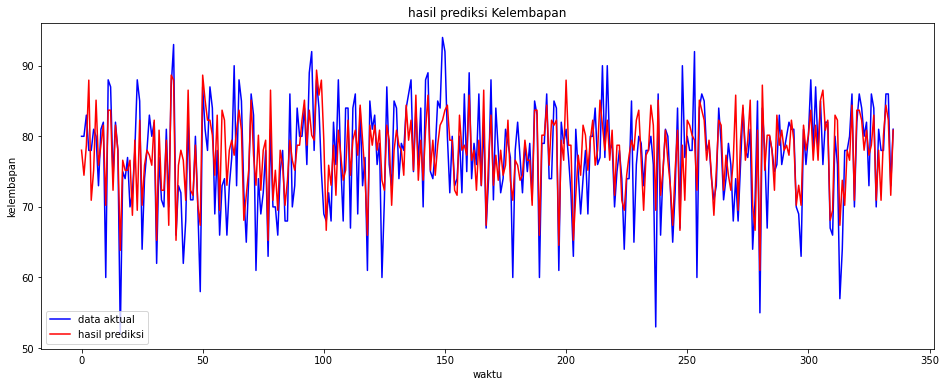

In [27]:
df['Data fix'].plot(figsize=(16,6), color='blue', label='data aktual')
df['Data predict'].plot(figsize=(16,6), color='red', label='hasil prediksi')
plt.title('hasil prediksi Kelembapan')
plt.xlabel('waktu')
plt.ylabel('kelembapan')
plt.legend(loc='lower left')

In [25]:
df.describe()

,Data fix,Data predict
count,336.000000,336.000000
mean,77.940476,77.771858
std,6.837301,6.979731
min,52.000000,52.533649
25%,74.000000,73.689861
50%,78.000000,77.823830
75%,83.000000,82.687332
max,94.000000,93.387024


In [ ]:
plotdata = df.mean()
ax = plotdata.plot(kind="bar", color=['blue', 'red'], rot=0, x='pillar', y='%')
ax.bar_label(ax.containers[0], label_type='edge')
plt.tight_layout()
plt.title("nilai rata-rata kelembapan")
plt.ylabel("kelembapan dalam persen")